# Train / Test: Part 1

We'll start by creating some data set that we want to build a model for (in this case a polynomial regression):

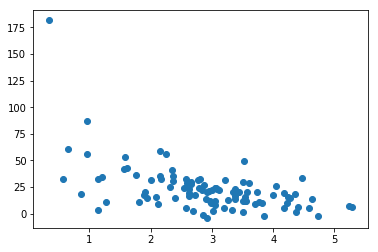

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Now we'll split the data in two - 80% of it will be used for "training" our model, and the other 20% for testing it. This way we can avoid overfitting.

In [2]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


In [3]:
trainX.shape

(80L,)

In [4]:
testX.shape

(20L,)

Here's our training dataset:

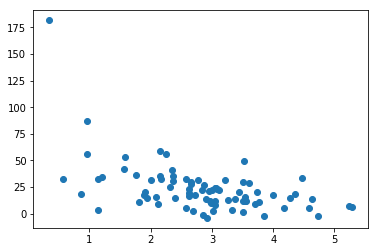

In [5]:
plt.scatter(trainX, trainY)

And our test dataset:

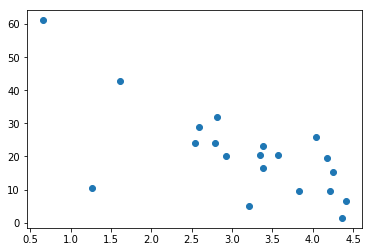

In [6]:
plt.scatter(testX, testY)

Now we'll try to fit an 8th-degree polynomial to this data (which is almost certainly overfitting, given what we know about how it was generated!)

In [7]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

Let's plot our polynomial against the training data:

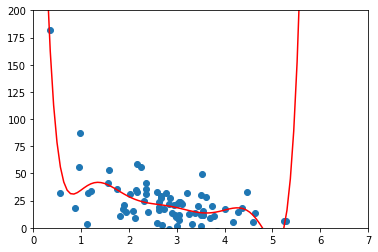

In [8]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


And against our test data:

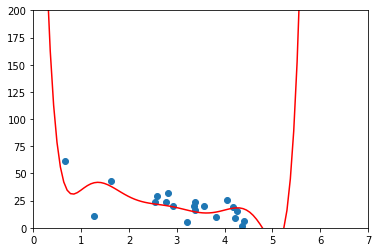

In [9]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Doesn't look that bad when you just eyeball it, but the r-squared score on the test data is kind of horrible! This tells us that our model isn't all that great...

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.3001816861141787


...even though it fits the training data better:

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6427069514694241


If you're working with a Pandas DataFrame (using tabular, labeled data,) scikit-learn has built-in train_test_split functions to make this easy to do.

Later we'll talk about even more robust forms of train/test, like K-fold cross-validation - where we try out multiple different splits of the data, to make sure we didn't just get lucky with where we split it.

## Activity

Try measuring the error on the test data using different degree polynomial fits. What degree works best?

In [12]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np

#Load the data set and repalce the empty rows for NaN valeu
data = pd.read_csv('C:\\Users\\Diego Alves\\Desktop\\Data_sets\\advertising.csv',header=0,encoding = 'unicode_escape')

In [13]:
import numpy
sales = numpy.array(data['sales'])
tv = numpy.array(data['TV'])

In [14]:
trainX1 = sales[:80]
testX1 = sales[80:]

trainY1 = tv[:80]
testY1 = tv[80:]

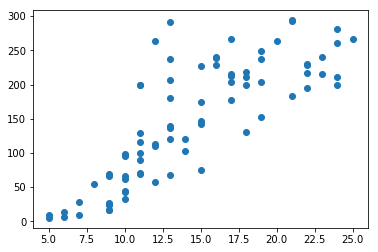

In [15]:
scatter(trainX1, trainY1)

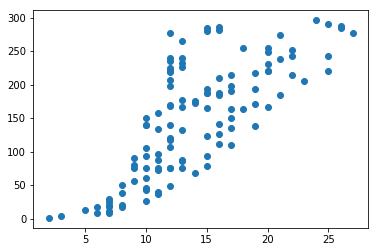

In [16]:
scatter(testX1, testY1)

In [17]:
import numpy

x1 = np.array(trainX1)
y1 = np.array(trainY1)

p4 = np.poly1d(np.polyfit(x1, y1, 1)) # change the number next to y1,y1,'' to find the best fitting line for the polynomio.

In [18]:
x1.shape

(80L,)

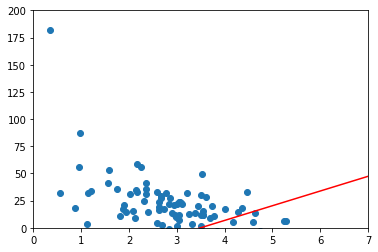

In [19]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

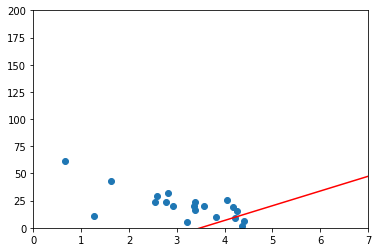

In [20]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

-6.094150129224237


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

-2.7814339053045485


## New way to split the data: 

In [23]:
import pandas as pd
import numpy as np
#Load the data set and repalce the empty rows for NaN valeu
df = pd.read_csv('C:\\Users\\Diego Alves\\Desktop\\Data_sets\\advertising.csv',header=0,encoding = 'unicode_escape')
df.head()

,TV,radio,newspaper,sales
0,230,38,69,22
1,45,39,45,10
2,17,46,69,9
3,152,41,59,19
4,181,11,58,13


In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline

## TV vs Sales

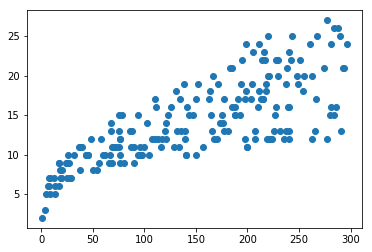

In [25]:
plt.scatter(df['TV'], df['sales'])

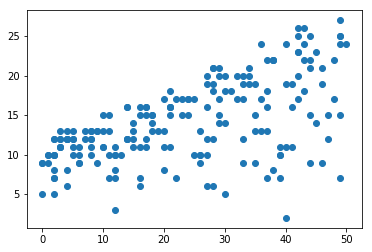

In [26]:
plt.scatter(df['radio'], df['sales'])

In [27]:
x = df[['TV', 'radio']]
y = df[['sales']]

In [28]:
x.head()

,TV,radio
0,230,38
1,45,39
2,17,46
3,152,41
4,181,11


In [29]:
y.head()

,sales
0,22
1,10
2,9
3,19
4,13


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Split the data: 80% and 20%
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((160, 2), (40, 2), (160, 1), (40, 1))


In [33]:
len(x_train)

160

In [34]:
len(x_test)

40

In [35]:
# Lets fit the data to a linear regression
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [36]:
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#test accuracy
clf.score(x_train, y_train)

0.8881875451593453

In [38]:
y_predict = clf.predict(x_test)

In [39]:
np.mean((y_test - y_predict) ** 2) #mean squared error

sales    1.874004
dtype: float64

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
mean_squared_error(y_test, y_predict)

1.8740044854899156